# Diabetes or not: A Comprehensive Analysis of Diabetical Symptoms in Pima Indians Diabetes Database #

### by Brian Adhitya, Wyatt Howell, Brian Ko, Nishanth Selvakumar

### Introduction

Diabetes is a common and chronic condition characterized by high blood sugar levels. It occurs when the body can't produce enough insulin or can't use it effectively. There are different types of diabetes, including Type 1, where the immune system attacks insulin-producing cells, and Type 2, usually linked to insulin resistance. Diabetes is a major global health concern, leading to complications like heart diseases, kidney issues, vision problems, and nerve damage. Lifestyle factors and genetics contribute to its development. Management involves medication, lifestyle changes, and regular monitoring. Due to its widespread impact, diabetes is a focus of ongoing research and public health efforts.

The question we are trying to answer is: **How will other health factors influence glucose, and diabetes diagnosis?**

### Loading libraries

In [4]:
# importing libraries
library(tidyverse)
library(repr)
library(janitor)
library(ggplot2)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ──────

### Preeliminary exploratory data analysis

**1. Loading and cleaning the Dataset**

In [5]:
# Cleaning names and specifying categorical variable
diabetes <- read_csv("data/diabetes.csv") |>
            clean_names() |>
            mutate(outcome = as_factor(outcome)) |>
            mutate(diabetes = fct_recode(outcome, "Yes" = "1", "No" = "0")) |>
            select(-outcome)

# Displaying the data
head(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,Yes
1,85,66,29,0,26.6,0.351,31,No
8,183,64,0,0,23.3,0.672,32,Yes
1,89,66,23,94,28.1,0.167,21,No
0,137,40,35,168,43.1,2.288,33,Yes
5,116,74,0,0,25.6,0.201,30,No


**2. Splitting into testing and training**

In [6]:
# splitting the diatabes data
diabetes_split <- initial_split(diabetes, prop = 0.75, strata = diabetes)

# training data
diabetes_training <- training(diabetes_split)

# testing data
diabetes_testing <- testing(diabetes_split)

# the data to be used
head(diabetes_training)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,No
1,89,66,23,94,28.1,0.167,21,No
10,115,0,0,0,35.3,0.134,29,No
4,110,92,0,0,37.6,0.191,30,No
10,139,80,0,0,27.1,1.441,57,No
1,103,30,38,83,43.3,0.183,33,No


**3. Cleaning and wrangling data**

In [10]:
# Summarizing the age data
diabetes_summary_age <- diabetes_training |>
                        group_by(diabetes) |>
                        summarize(min_age = min(age, na.rm = TRUE),
                                max_age = max(age, na.rm = TRUE),
                                mean_age = mean(age, na.rm = TRUE))

# Summarizing the glucose level data
diabetes_summary_glucose <- diabetes_training |>
                            group_by(diabetes) |>
                            summarize(min_glucose = min(glucose, na.rm = TRUE),
                                      max_glucose = max(glucose, na.rm = TRUE),
                                      mean_glucose = mean(glucose, na.rm = TRUE))

# Summarize the pregnancies data
diabetes_summary_pregnancies <- diabetes_training |>
                            group_by(diabetes) |>
                            summarize(min_pregnancies = min(pregnancies, na.rm = TRUE),
                                      max_pregnancies = max(pregnancies, na.rm = TRUE),
                                      mean_pregnancies = mean(pregnancies, na.rm = TRUE))

# joining all the summaries into a dataframe
diabetes_summary <- full_join(diabetes_summary_age, diabetes_summary_glucose, by = "diabetes") |>
                    full_join(diabetes_summary_pregnancies, by = "diabetes")

# displaying the data
head(diabetes_summary)

diabetes,min_age,max_age,mean_age,min_glucose,max_glucose,mean_glucose,min_pregnancies,max_pregnancies,mean_pregnancies
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,21,72,31.44800,0,194,109.8480,0,13,3.280000
Yes,21,70,37.37811,0,199,139.7761,0,17,4.860697


From this simple summary table, we can see that diabetes tends to happen more within pregnant people.

**4. Visualizing some key points**

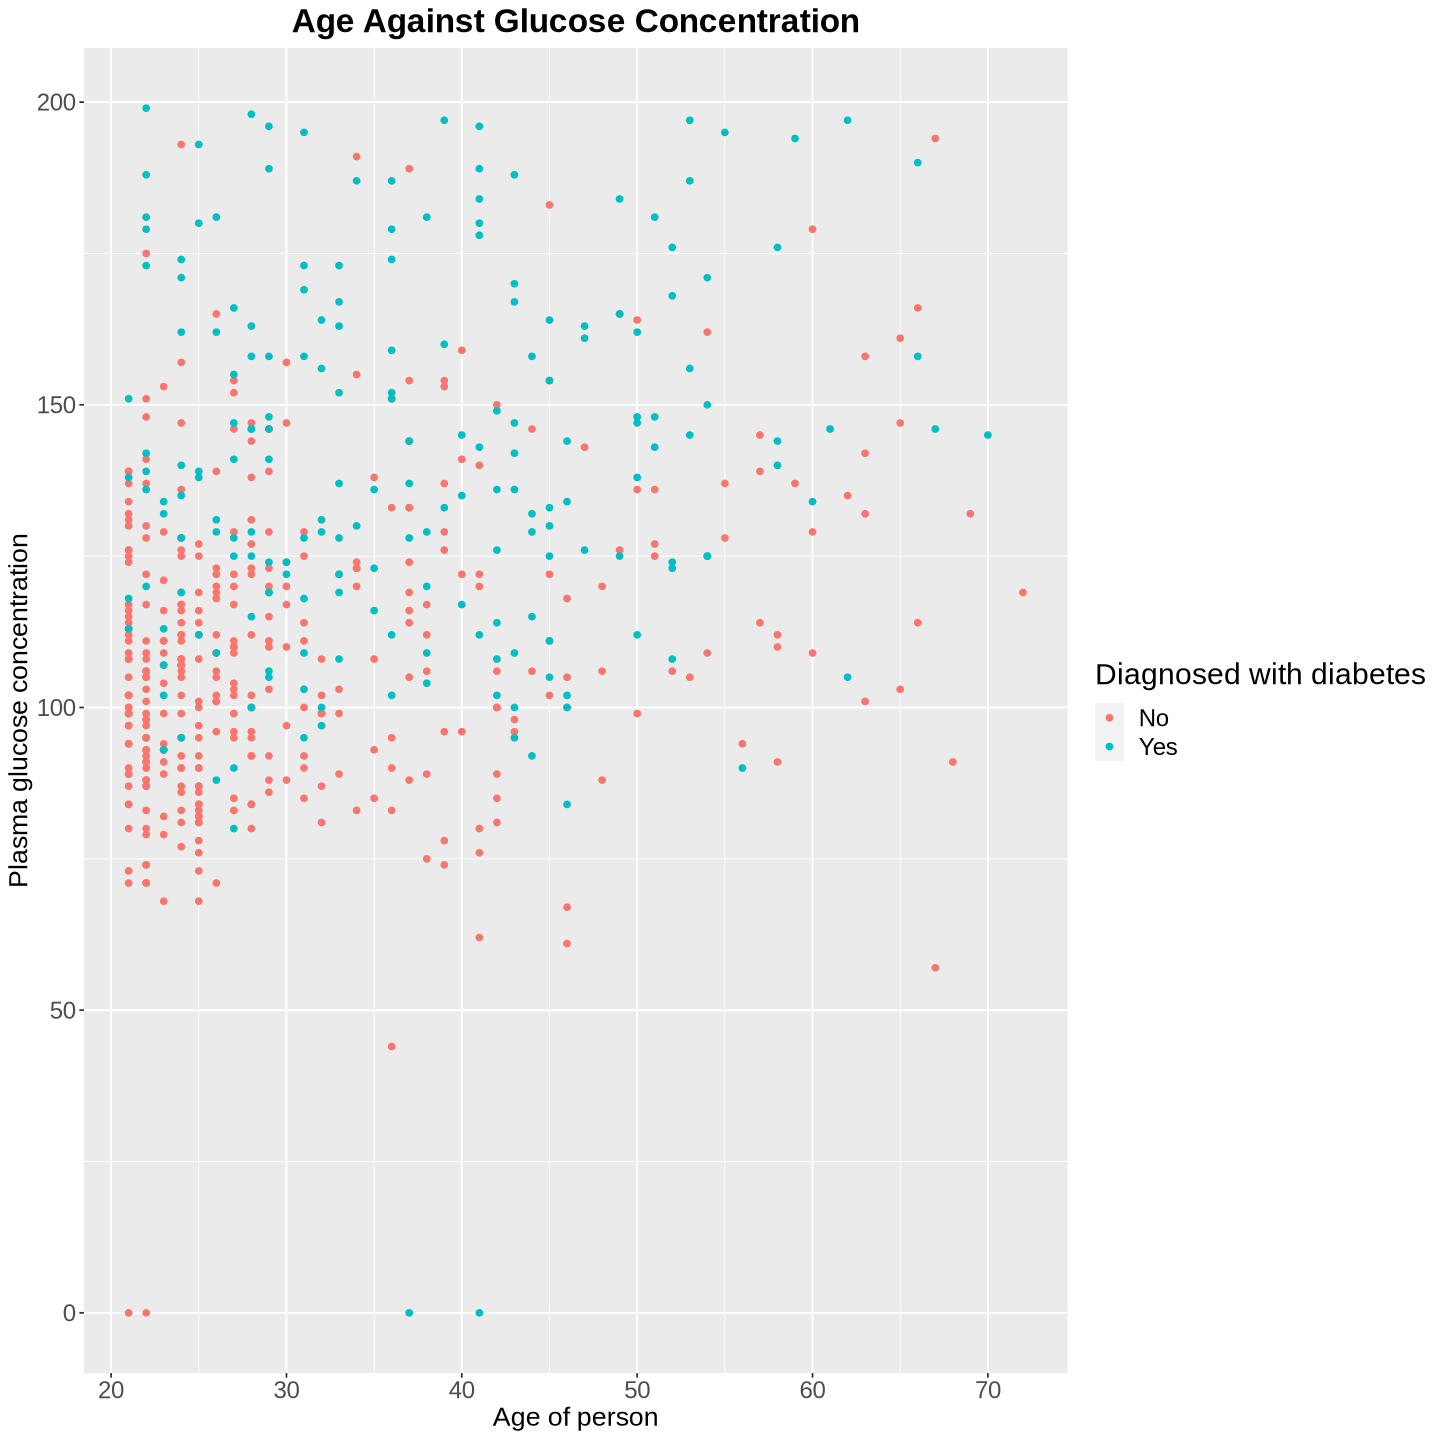

In [28]:
options(repr.plot.width = 12, repr.plot.height = 12)

diabetes_age_plot <- diabetes_training |>
                    ggplot(aes(x = age, y = glucose, color = diabetes)) +
                    geom_point(alpha = 1.5) +
                    xlab("Age of person") +
                    ylab("Plasma glucose concentration") +
                    labs(color = "Diagnosed with diabetes") +
                    ggtitle("Age Against Glucose Concentration") +
                    theme(text = element_text(size = 18),
                          plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
                          axis.title.x = element_text(size = 16),
                          axis.title.y = element_text(size = 16))

diabetes_age_plot

### Methods

1. **pregnancies** - Number of times pregnant
2. **glucose** - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **blood_pressure** - Diastolic blood pressure (mm Hg)
4. **skin_thickness** - Triceps skin fold thickness (mm)
5. **insulin** - 2-Hour serum insulin (mu U/ml)
6. **bmi** - Body mass index (weight in kg/(height in m)^2)
7. **diabetes_pedigree_function** - Diabetes pedigree function
8. **age** - Age (years)
9. **diabetes** - Whether the patient has diabetes

### Expected Outcomes and Significance

What we would like to find:
- Finding 1
- Finding 2
- Finding 3
- Finding 4

Such findings will be able to create a much bigger impact in the future, such as ...

Some future questions that this could lead to include:
1. Question 1
2. Question 2
3. Question 3
4. Question 4

### Bibliography

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.